# Tensorflow to learn simple functions


## Import needed for Jupiter

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import Image

## Import needed for the code

In [2]:
import numpy as np
import tensorflow as tf

import fnmatch, os
import time

## A simple model to learn simples functions

<IPython.core.display.Javascript object>


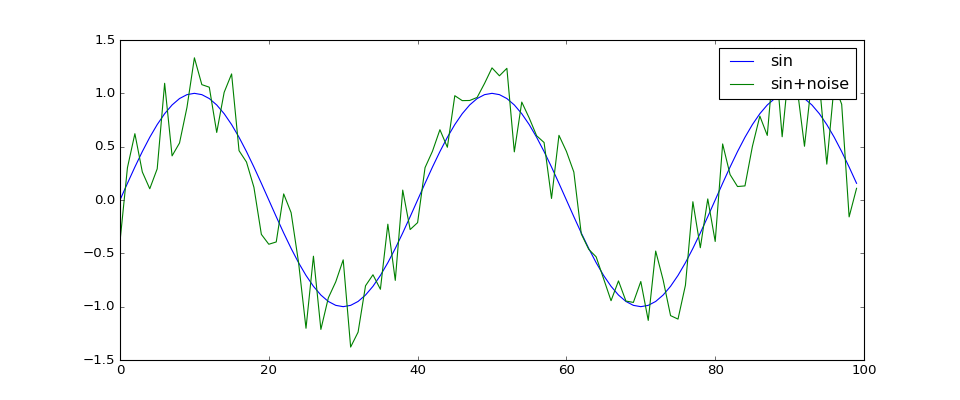

In [4]:
import math
import random
batch_size = 100

# define the data
xx = [i*math.pi/100 for i in range(100)]
yy = [math.sin(i*5) for i in xx]
y_ = [ [yy[i]+random.random()-0.5 ] for i in range(batch_size) ]

plt.figure(figsize=(12,5))
plt.plot(range(len(yy)), yy, label='sin')
plt.plot(range(len(y_)), y_, label='sin+noise')
plt.legend()
plt.show()

## Define the model

In [23]:
#model
tf.reset_default_graph()
hidden_size = 1
vector_size = 100

# define place holder to for the input data and the target.
x = tf.placeholder(tf.float32, [vector_size, 1], name='x')
y = tf.placeholder(tf.float32, [vector_size, 1], name='y')
lr = tf.Variable(0.0, trainable=False, name='learning_rate')

# model parameters
Wxh = tf.Variable(tf.random_uniform((hidden_size, vector_size))*0.01, name='Wxh') # input to hidden
Why = tf.Variable(tf.random_uniform((vector_size, hidden_size))*0.01, name='Why') # hidden to output
bh = tf.Variable(tf.zeros((hidden_size, 1)), name='bh') # hidden bias
by = tf.Variable(tf.zeros((vector_size, 1)), name='by') # output bias


hidden = tf.tanh(tf.matmul(Wxh, x)+bh)
pred = tf.tanh(tf.matmul(Why, hidden)+by)

#hidden = tf.tanh(tf.matmul(Wxh, x))
#pred = tf.tanh(tf.matmul(Why, hidden))

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-y, 2))

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)


## Training

In [24]:
epoch_count = 100
learning_rate = 0.02
decay_rate = 0.98
batch = 100

sess =  tf.Session()

cost_optimisation = []
with sess.as_default():
    tf.initialize_all_variables().run()
    print ("variable initialized")
    
    for e in range(epoch_count):
        sess.run(tf.assign(lr, learning_rate * (decay_rate ** e)))
        start = time.time()
        # Get learning data
        x_ = [ [xx[i]] for i in range(batch) ]
        y_ = [ [yy[i]+random.random()-0.5 ] for i in range(batch) ] # We add noise to the training
        feed = {x: x_, y: y_}
        # Run a session using train_op
        train_loss, _ = sess.run([cost, optimizer], feed)
        end = time.time()
        cost_optimisation.append(train_loss)
        print("{}/{} (epoch {}), train_loss = {:.6f}, time/batch = {:.3f}" \
            .format(e, epoch_count,
                    e, train_loss, end - start))
                
   

variable initialized
0/100 (epoch 0), train_loss = 59.218170, time/batch = 0.009
1/100 (epoch 1), train_loss = 52.831665, time/batch = 0.005
2/100 (epoch 2), train_loss = 42.627319, time/batch = 0.004
3/100 (epoch 3), train_loss = 40.978222, time/batch = 0.005
4/100 (epoch 4), train_loss = 33.692562, time/batch = 0.003
5/100 (epoch 5), train_loss = 32.270683, time/batch = 0.003
6/100 (epoch 6), train_loss = 29.360413, time/batch = 0.003
7/100 (epoch 7), train_loss = 23.717667, time/batch = 0.003
8/100 (epoch 8), train_loss = 25.691589, time/batch = 0.003
9/100 (epoch 9), train_loss = 26.314137, time/batch = 0.003
10/100 (epoch 10), train_loss = 24.088791, time/batch = 0.003
11/100 (epoch 11), train_loss = 22.199383, time/batch = 0.004
12/100 (epoch 12), train_loss = 19.793179, time/batch = 0.003
13/100 (epoch 13), train_loss = 20.785755, time/batch = 0.003
14/100 (epoch 14), train_loss = 18.275990, time/batch = 0.003
15/100 (epoch 15), train_loss = 16.146816, time/batch = 0.003
16/100 

## cost

<IPython.core.display.Javascript object>


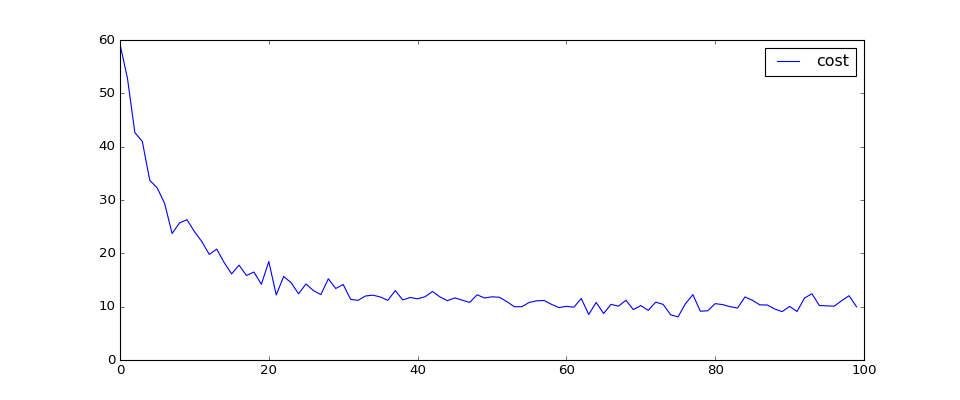

In [25]:
# Check the cost
plt.figure(figsize=(12,5))
plt.plot(range(len(cost_optimisation)), cost_optimisation, label='cost')
plt.legend()
plt.show()

## use the model to make a prediction

In [26]:
 with sess.as_default():
    x_ = [ [xx[i]] for i in range(batch) ]
    feed = {x: x_}
    [prediction] = sess.run([pred], feed)

<IPython.core.display.Javascript object>


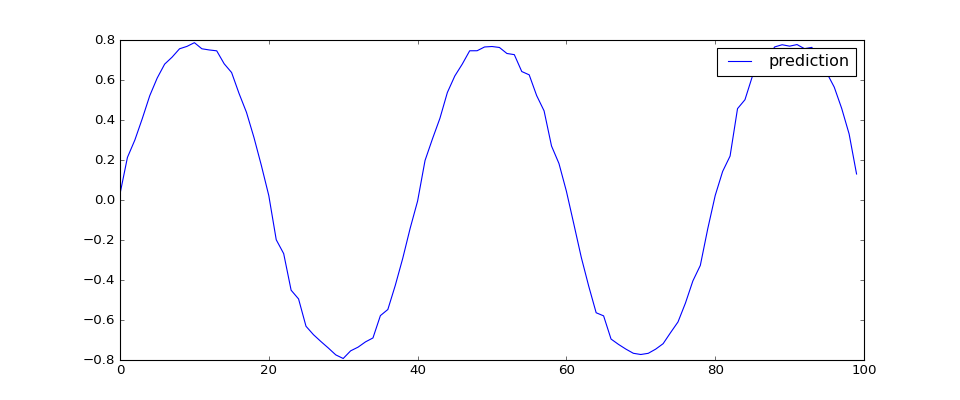

In [27]:
plt.figure(figsize=(12,5))
plt.plot(range(len(prediction)), prediction, label='prediction')
plt.legend()
plt.show()
 

## inspect the model

nt learning_rate:0 ()
t Wxh:0 (1, 100) :


<IPython.core.display.Javascript object>


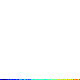

t Why:0 (100, 1) :


<IPython.core.display.Javascript object>


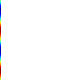

t bh:0 (1, 1) :


<IPython.core.display.Javascript object>


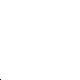

t by:0 (100, 1) :


<IPython.core.display.Javascript object>


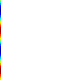

In [28]:
with sess.as_default():
    for var in tf.all_variables():
        if var in tf.trainable_variables():
            print 't', var.name, var.eval().shape, ':'
            plt.figure(figsize=(1,1))
            plt.figimage(var.eval(), label=var.name)
            plt.show()
        else:
            print 'nt', var.name, var.eval().shape
    

Feedback wellcome __@dh7net__